In [134]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Twitter API Keys
consumer_key = "Key"
consumer_secret = "Key"
access_token = "Key"
access_token_secret = "Key"

In [3]:
# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User Account
target_user = ['@BBCWorld','@CBS','@CNN','@FoxNews','@nytimes']

In [151]:
# Variables for holding sentiments
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_ago_list = []
color_list = []

for i in (target_user):
    
    Count = 0
    
    if i == '@BBCWorld':
        color = 'Blue'
    elif i == '@CBS':
        color = 'Green'
    elif i == '@CNN':
        color = 'Yellow'
    elif i == '@FoxNews':
        color = 'Red'
    else:
        color = 'Gray'
        
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(i)
        
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user = i
            
            # Add each value to the appropriate array
            user_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_ago_list.append(Count)
            color_list.append(color)
            
            Count += 1

In [152]:
# Store into Dataframe
df = pd.DataFrame({'News Organization': user_list,
                   'Compound Score': compound_list,
                  'Positive Score': positive_list,
                  'Negative Score': negative_list,
                  'Neutral Score': neutral_list,
                  'Tweets Ago': tweet_ago_list,
                  'Color': color_list})
df = df.replace('@BBCWorld','BBC')
df = df.replace('@CBS','CBS')
df = df.replace('@CNN','CNN')
df = df.replace('@FoxNews','Fox')
df = df.replace('@nytimes','NY Times')
df

,Color,Compound Score,Negative Score,Neutral Score,News Organization,Positive Score,Tweets Ago
0,Blue,-0.6486,0.350,0.650,BBC,0.000,0
1,Blue,-0.0772,0.161,0.699,BBC,0.140,1
2,Blue,-0.1513,0.097,0.834,BBC,0.069,2
3,Blue,-0.6486,0.444,0.397,BBC,0.159,3
4,Blue,-0.4404,0.162,0.838,BBC,0.000,4
5,Blue,-0.4404,0.367,0.633,BBC,0.000,5
6,Blue,-0.8481,0.568,0.432,BBC,0.000,6
7,Blue,0.0000,0.000,1.000,BBC,0.000,7
8,Blue,0.4939,0.000,0.738,BBC,0.262,8
9,Blue,0.0000,0.000,1.000,BBC,0.000,9


In [153]:
df_BBC = df[df['Color']=='Blue']
df_CBS = df[df['Color']=='Green']
df_CNN = df[df['Color']=='Yellow']
df_Fox = df[df['Color']=='Red']
df_NYT = df[df['Color']=='Gray']

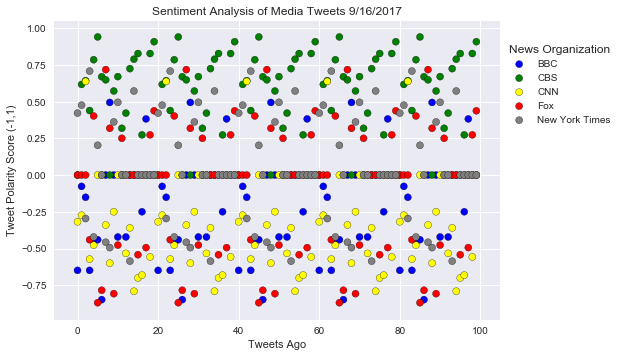

In [154]:
# Scatterplot of the Compound Scores
plt.scatter(df_BBC['Tweets Ago'],df_BBC['Compound Score'],color=df_BBC['Color'],edgecolor='black',label='BBC')
plt.scatter(df_CBS['Tweets Ago'],df_CBS['Compound Score'],color=df_CBS['Color'],edgecolor='black',label='CBS')
plt.scatter(df_CNN['Tweets Ago'],df_CNN['Compound Score'],color=df_CNN['Color'],edgecolor='black',label='CNN')
plt.scatter(df_Fox['Tweets Ago'],df_Fox['Compound Score'],color=df_Fox['Color'],edgecolor='black',label='Fox')
plt.scatter(df_NYT['Tweets Ago'],df_NYT['Compound Score'],color=df_NYT['Color'],edgecolor='black',label='New York Times')
plt.title('Sentiment Analysis of Media Tweets 9/16/2017')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity Score (-1,1)')
plt.legend(title='News Organization',bbox_to_anchor=(1, 0.95))
sns.set()
plt.show()

In [155]:
# Means
BBC_mean = df_BBC['Compound Score'].mean()
CBS_mean = df_CBS['Compound Score'].mean()
CNN_mean = df_CNN['Compound Score'].mean()
Fox_mean = df_Fox['Compound Score'].mean()
NYT_mean = df_NYT['Compound Score'].mean()

In [156]:
# New df
df_mean = pd.DataFrame({'News': ['BBC','CBS','CNN','Fox','NY Time'],
                       'Mean Score': [BBC_mean,CBS_mean,CNN_mean,Fox_mean,NYT_mean]})
df_mean

,Mean Score,News
0,-0.173595,BBC
1,0.553275,CBS
2,-0.290715,CNN
3,-0.100810,Fox
4,0.048995,NY Time


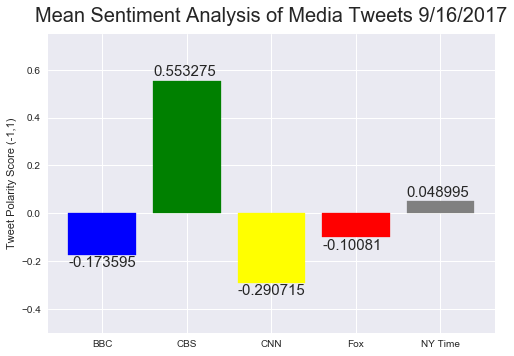

In [159]:
# Bar Graph
x_obj = [i for i in df_mean['News']]
x = np.arange(len(x_obj))
y = [i for i in df_mean['Mean Score']]
bar = plt.bar(x,y)
bar[0].set_color('Blue')
bar[1].set_color('Green')
bar[2].set_color('Yellow')
bar[3].set_color('Red')
bar[4].set_color('Gray')
plt.text(2, 0.8, 'Mean Sentiment Analysis of Media Tweets 9/16/2017',
         horizontalalignment='center',
         fontsize=20)
plt.xticks(x,x_obj)
plt.ylabel('Tweet Polarity Score (-1,1)')
plt.ylim(-0.5,0.75)
plt.text(x[0] - 0.4,y[0]-0.05,str(y[0]),size=15)
plt.text(x[1] - 0.4,y[1]+0.02,str(y[1]),size=15)
plt.text(x[2] - 0.4,y[2]-0.05,str(y[2]),size=15)
plt.text(x[3] - 0.4,y[3]-0.05,str(y[3]),size=15)
plt.text(x[4] - 0.4,y[4]+0.02,str(y[4]),size=15)
plt.show()